In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import time
import seaborn as sns
%matplotlib inline

In [2]:
# Tweepy keys and token

consumer_key = '****'
consumer_secret = '****'
access_token = '****'
access_secret = '****'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [3]:
###1 - Gathering Data

twitter_arch_df = pd.read_csv('twitter-archive-enhanced.csv')


In [4]:
#requsting the tweets
with open ('image-predictions.tsv','wb') as file:
    img_pred = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv', auth=('user', 'pass'))
    file.write(img_pred.content)


In [5]:
#open the tsv file
img_pred_df = pd.read_csv('image-predictions.tsv',sep = '\t')


In [6]:
#Collecting information from Twitter api
collected =[]
not_collected = [] # to avoid the errors because of exception 
with open ('tweet_json.txt','w') as file:
    for twitter_id in list(twitter_arch_df['tweet_id']):
        try:
            tweet_status = api.get_status(twitter_id,tweet_mode='extended')
            json.dump(tweet_status._json, file)
            file.write('\n')
            collected.append(twitter_id)
        except Exception as e:
            not_collected.append(twitter_id)

In [7]:
tweet_status = pd.read_json('tweet_json.txt', lines= True , encoding = 'utf-8')

In [8]:
twitter_arch_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
twitter_arch_df.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2140,670003130994700288,NaN,NaN,2015-11-26 22:16:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Raphael. He is a Baskerville Conquista...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670003130...,10,10,Raphael,None,None,None,None
1924,674075285688614912,NaN,NaN,2015-12-08 03:57:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Mitch. He thinks that's a hat. No...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674075285...,11,10,Mitch,None,None,None,None
954,751793661361422336,NaN,NaN,2016-07-09 15:02:31 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Fred. He's having one heck of a summer...,NaN,NaN,NaN,https://vine.co/v/5W5YHdTJvaV,11,10,Fred,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
676,789314372632018944,NaN,NaN,2016-10-21 03:56:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",HE WAS JUST A LIL SLEEPY FROM BEING SUCH A GOO...,NaN,NaN,NaN,https://twitter.com/sebscat/status/78881832853...,13,10,None,None,None,None,None
1209,715696743237730304,NaN,NaN,2016-04-01 00:26:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Toby. He's a Lithuanian High-Steppin Stic...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715696743...,10,10,Toby,None,None,None,None
1329,705898680587526145,NaN,NaN,2016-03-04 23:32:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Max. He's a Fallopian Cephalopuff. Eyes a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705898680...,10,10,Max,None,None,None,None
2136,670055038660800512,NaN,NaN,2015-11-27 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tommy. He's a cool dog. Hard not to st...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670055038...,3,10,Tommy,None,None,None,None
2077,670833812859932673,NaN,NaN,2015-11-29 05:16:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jett. He is unimpressed by flower. 7/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670833812...,7,10,Jett,None,None,None,None
1723,680100725817409536,NaN,NaN,2015-12-24 19:00:23 +0000,"<a href=""https://about.twitter.com/products/tw...",This pupper is not coming inside until she cat...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680100725...,11,10,None,None,None,pupper,None


In [10]:
img_pred_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [11]:
tweet_status

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771,2015-11-24 17:19:36+00:00,669203728096960512,669203728096960512,This is Samsom. He is sexually confused. Reall...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 669203717908926469, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1772,2015-11-24 06:17:19+00:00,669037058363662336,669037058363662336,Here we have Pancho and Peaches. Pancho is a C...,False,"[0, 141]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 669037052726505472, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1773,2015-11-24 04:52:37+00:00,669015743032369152,669015743032369152,Super rare dog right here guys. Doesn't bark. ...,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 669015737663684612, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1774,2015-11-24 04:17:01+00:00,669006782128353280,669006782128353280,This is Tucker. He is 100% ready for the sport...,False,"[0, 110]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 669006778303127553, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [12]:
twitter_arch_df[twitter_arch_df['rating_denominator'] >15]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60,50,a,None,None,None,None
1433,697463031882764288,NaN,NaN,2016-02-10 16:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697463031...,44,40,None,None,None,None,None


In [13]:
twitter_arch_df[twitter_arch_df['rating_denominator']%4 == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
1433,697463031882764288,NaN,NaN,2016-02-10 16:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697463031...,44,40,None,None,None,None,None
1598,686035780142297088,6.860340e+17,4.196984e+09,2016-01-10 04:04:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Yes I do realize a rating of 4/20 would've bee...,NaN,NaN,NaN,NaN,4,20,None,None,None,None,None
1663,682808988178739200,6.827884e+17,4.196984e+09,2016-01-01 06:22:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I'm aware that I could've said 20/16, but here...",NaN,NaN,NaN,NaN,20,16,None,None,None,None,None
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515...,144,120,None,None,None,None,None
1843,675853064436391936,NaN,NaN,2015-12-13 01:41:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an entire platoon of puppers. Tot...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675853064...,88,80,None,None,None,None,None


In [14]:
twitter_arch_df[twitter_arch_df['rating_denominator']%50
                == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60,50,a,None,None,None,None


In [15]:
twitter_arch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
twitter_arch_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
twitter_arch_df[twitter_arch_df['rating_denominator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [18]:
twitter_arch_df[twitter_arch_df['rating_numerator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [19]:
img_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
img_pred_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
tweet_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1776 entries, 0 to 1775
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     1776 non-null   datetime64[ns, UTC]
 1   id                             1776 non-null   int64              
 2   id_str                         1776 non-null   int64              
 3   full_text                      1776 non-null   object             
 4   truncated                      1776 non-null   bool               
 5   display_text_range             1776 non-null   object             
 6   entities                       1776 non-null   object             
 7   extended_entities              1550 non-null   object             
 8   source                         1776 non-null   object             
 9   in_reply_to_status_id          69 non-null     float64            
 10  in_reply_to_status_id_st

In [22]:
tweet_status.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,1.776000e+03,1.776000e+03,6.900000e+01,6.900000e+01,6.900000e+01,6.900000e+01,0.0,0.0,0.0,1776.000000,1776.000000,1651.0,1651.0,2.200000e+01,2.200000e+01
mean,7.508405e+17,7.508405e+17,7.471549e+17,7.471549e+17,2.276889e+16,2.276889e+16,NaN,NaN,NaN,2913.634572,8330.820383,0.0,0.0,8.305694e+17,8.305694e+17
std,7.363020e+16,7.363020e+16,7.811701e+16,7.811701e+16,1.330848e+17,1.330848e+17,NaN,NaN,NaN,4390.513025,11957.932867,0.0,0.0,4.623330e+16,4.623330e+16
min,6.690004e+17,6.690004e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,1.000000,0.000000,0.0,0.0,7.061659e+17,7.061659e+17
25%,6.796741e+17,6.796741e+17,6.757073e+17,6.757073e+17,2.918590e+08,2.918590e+08,NaN,NaN,NaN,593.000000,1405.750000,0.0,0.0,8.049561e+17,8.049561e+17
50%,7.081144e+17,7.081144e+17,7.030419e+17,7.030419e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1443.500000,3251.000000,0.0,0.0,8.401301e+17,8.401301e+17
75%,8.177902e+17,8.177902e+17,8.319030e+17,8.319030e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3477.750000,11126.750000,0.0,0.0,8.699215e+17,8.699215e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,55376.000000,130766.000000,0.0,0.0,8.860534e+17,8.860534e+17


Assessment report
Quality issues in:

1- twitter_arch_df:
    1- there is a lot of missing data.
    2- Delete the zeroth value in rating_denominator column.
    3- delete any value in rating_numinator column above (80) 
    4- delete any value in rating_denominator column above (80)
    5- No(1254) replace (80 by 10) in denominator column
    6- No(1254) replace (80 by 10) in numenator column
    7- No(1433) replace (40 by 10) in numenator column
    8- No(1433) replace (40 by 10) in denominator column
    9- No(1202) replace (40 by 10) in numenator column
    10- No(1202) replace (40 by 10) in denominator column
    11- No(1274) replace (45 by 15) in numenator column
    12- No(1274) replace (50 by 10) in denominator column
    13- No(1351) replace (50 by 10) in denominator column
    14- No(1274) replace (60 by 10) in numenator column
    15- Delete the zeroth value in rating_numerator column.


2- img_pred_df:
    1- Missing data


3- tweet_status:
    1- missing data
    2- I think that we can delete the column of the language because we know that the whole data is in 
    English.

Tidness issues:

* retweets and favorites in their own table (tweets_df)
* three separate tables


1- twitter_arch_df: 
    1- it's better to make just one column to include the types of the dogs.
    2- there is a lot of columns that we don't need it in the analysis process like
        ['retweeted_status_user_id'].


2- img_pred_df:
    1- give the columns which are related to (p1,p2,p3) more describtive names.


3- tweet_status:
    1- delete un-needed data ('columns') in analysis like ['possibly_sensitive']

Data cleaning

    here we will solve the issues which we have seen in the data in 
        the assessmen step.

In [23]:
# at first we will make copies to work with it 

twitter_arch_clean = twitter_arch_df.copy()
img_pred_clean = img_pred_df.copy()
tweet_status_clean = tweet_status.copy() 

1- for tweet_arch_df

In [24]:
# remove the zeroth value in rating_denominator
x= twitter_arch_clean[twitter_arch_clean['rating_denominator']==0]
twitter_arch_clean.drop(x.index,inplace=True)

In [25]:
#test
twitter_arch_clean[twitter_arch_clean['rating_denominator']==0]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [26]:
# remove the zeroth values in rating_numerator
y = twitter_arch_clean[twitter_arch_clean['rating_numerator']==0]
twitter_arch_clean.drop(y.index,inplace=True)

In [27]:
#test
twitter_arch_clean[twitter_arch_clean['rating_numerator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [28]:
# remove any rating_numerator>20 
z= twitter_arch_clean[twitter_arch_clean['rating_numerator']>80]
twitter_arch_clean.drop(z.index,inplace=True)

In [29]:
#test
twitter_arch_clean[twitter_arch_clean['rating_numerator']>80]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [30]:
#test for rating_denominator
twitter_arch_clean[twitter_arch_clean['rating_numerator']>80]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [31]:
twitter_arch_clean[twitter_arch_clean['rating_numerator']==80]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [32]:
twitter_arch_clean['rating_numerator'] = twitter_arch_clean['rating_numerator'].replace(80,10)
twitter_arch_clean[twitter_arch_clean['rating_numerator']==80]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [33]:
twitter_arch_clean['rating_numerator'] = twitter_arch_clean['rating_numerator'].replace(40,10)
twitter_arch_clean['rating_numerator'] = twitter_arch_clean['rating_numerator'].replace(50,10)
twitter_arch_clean['rating_numerator'] = twitter_arch_clean['rating_numerator'].replace(45,15)
twitter_arch_clean['rating_numerator'] = twitter_arch_clean['rating_numerator'].replace(60,10)
twitter_arch_clean[twitter_arch_clean['rating_numerator']==45]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [34]:
twitter_arch_clean['rating_denominator'] = twitter_arch_clean['rating_denominator'].replace(80,10)
twitter_arch_clean['rating_denominator'] = twitter_arch_clean['rating_denominator'].replace(40,10)
twitter_arch_clean['rating_denominator'] = twitter_arch_clean['rating_denominator'].replace(50,10)

twitter_arch_clean[twitter_arch_clean['rating_denominator']==50]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [35]:
#to test that there isn't any values above 20
twitter_arch_clean[twitter_arch_clean['rating_denominator']>20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


# for tweet_status

In [36]:
# delete un-needed columns like [ lang]
tweet_status_clean=tweet_status_clean.drop('possibly_sensitive',axis=1)


In [37]:
#test
tweet_status_clean

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,35549,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,30763,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,23130,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,38836,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,37113,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771,2015-11-24 17:19:36+00:00,669203728096960512,669203728096960512,This is Samsom. He is sexually confused. Reall...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 669203717908926469, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,948,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN
1772,2015-11-24 06:17:19+00:00,669037058363662336,669037058363662336,Here we have Pancho and Peaches. Pancho is a C...,False,"[0, 141]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 669037052726505472, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,618,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN
1773,2015-11-24 04:52:37+00:00,669015743032369152,669015743032369152,Super rare dog right here guys. Doesn't bark. ...,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 669015737663684612, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,698,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN
1774,2015-11-24 04:17:01+00:00,669006782128353280,669006782128353280,This is Tucker. He is 100% ready for the sport...,False,"[0, 110]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 669006778303127553, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,546,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN


### Tidness issues cleaning
  #### merge three datasets in one


In [38]:
twitter = pd.merge(twitter_arch_clean, img_pred_clean, how = 'left')

#Combine master dataframe with JSON
twitter = pd.merge(twitter, tweet_status, how = 'left')

In [39]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3494893 entries, 0 to 3494892
Data columns (total 57 columns):
 #   Column                         Dtype              
---  ------                         -----              
 0   tweet_id                       int64              
 1   in_reply_to_status_id          float64            
 2   in_reply_to_user_id            float64            
 3   timestamp                      object             
 4   source                         object             
 5   text                           object             
 6   retweeted_status_id            float64            
 7   retweeted_status_user_id       float64            
 8   retweeted_status_timestamp     object             
 9   expanded_urls                  object             
 10  rating_numerator               int64              
 11  rating_denominator             int64              
 12  name                           object             
 13  doggo                          object     

In [40]:
twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [41]:
twitter = twitter.drop(['possibly_sensitive','possibly_sensitive_appealable','retweeted_status','quoted_status_id'],axis=1)

In [42]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3494893 entries, 0 to 3494892
Data columns (total 53 columns):
 #   Column                      Dtype              
---  ------                      -----              
 0   tweet_id                    int64              
 1   in_reply_to_status_id       float64            
 2   in_reply_to_user_id         float64            
 3   timestamp                   object             
 4   source                      object             
 5   text                        object             
 6   retweeted_status_id         float64            
 7   retweeted_status_user_id    float64            
 8   retweeted_status_timestamp  object             
 9   expanded_urls               object             
 10  rating_numerator            int64              
 11  rating_denominator          int64              
 12  name                        object             
 13  doggo                       object             
 14  floofer                     object

In [44]:


twitter.loc[twitter['doggo'] == 'doggo', 'dog_class'] = 'doggo'
twitter.loc[twitter['floofer'] == 'floofer', 'dog_class'] = 'floofer'
twitter.loc[twitter['pupper'] == 'pupper', 'dog_class'] = 'pupper'
twitter.loc[twitter['puppo'] == 'puppo', 'dog_class'] = 'puppo'

twitter = twitter.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

twitter.isnull().sum()

tweet_id                            0
in_reply_to_status_id         3494819
in_reply_to_user_id           3494819
timestamp                           0
source                              0
text                                0
retweeted_status_id           3202208
retweeted_status_user_id      3202208
retweeted_status_timestamp    3202208
expanded_urls                    4966
rating_numerator                    0
rating_denominator                  0
name                                0
jpg_url                        221270
img_num                        221270
p1                             221270
p1_conf                        221270
p1_dog                         221270
p2                             221270
p2_conf                        221270
p2_dog                         221270
p3                             221270
p3_conf                        221270
p3_dog                         221270
created_at                          8
id                                  8
id_str      

In [45]:
twitter.drop(['in_reply_to_screen_name','in_reply_to_user_id_str','in_reply_to_status_id_str','quoted_status_permalink'
              ,'quoted_status_permalink','quoted_status'],axis=1,inplace=True)
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3494893 entries, 0 to 3494892
Data columns (total 45 columns):
 #   Column                      Dtype              
---  ------                      -----              
 0   tweet_id                    int64              
 1   in_reply_to_status_id       float64            
 2   in_reply_to_user_id         float64            
 3   timestamp                   object             
 4   source                      object             
 5   text                        object             
 6   retweeted_status_id         float64            
 7   retweeted_status_user_id    float64            
 8   retweeted_status_timestamp  object             
 9   expanded_urls               object             
 10  rating_numerator            int64              
 11  rating_denominator          int64              
 12  name                        object             
 13  jpg_url                     object             
 14  img_num                     float6

In [46]:
twitter.drop(['geo','coordinates','contributors'],axis=1,inplace=True)
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3494893 entries, 0 to 3494892
Data columns (total 42 columns):
 #   Column                      Dtype              
---  ------                      -----              
 0   tweet_id                    int64              
 1   in_reply_to_status_id       float64            
 2   in_reply_to_user_id         float64            
 3   timestamp                   object             
 4   source                      object             
 5   text                        object             
 6   retweeted_status_id         float64            
 7   retweeted_status_user_id    float64            
 8   retweeted_status_timestamp  object             
 9   expanded_urls               object             
 10  rating_numerator            int64              
 11  rating_denominator          int64              
 12  name                        object             
 13  jpg_url                     object             
 14  img_num                     float6

In [47]:
twitter.drop(['quoted_status_id_str','in_reply_to_user_id','in_reply_to_status_id'],axis=1,inplace=True)

In [48]:
twitter.drop('place',axis=1,inplace=True)

In [49]:
twitter_co = twitter.copy()

median_retweet = np.median(twitter_co.retweet_count.dropna())
median_favorite = np.median(twitter_co.favorite_count.dropna())

twitter_co.retweet_count = twitter_co.retweet_count.fillna(median_retweet).astype('int64')
twitter_co.favorite_count = twitter_co.favorite_count.fillna(median_favorite).astype('int64')

twitter_co.dropna(inplace=True)

twitter_co.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22800 entries, 122628 to 1395600
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    22800 non-null  int64              
 1   timestamp                   22800 non-null  object             
 2   source                      22800 non-null  object             
 3   text                        22800 non-null  object             
 4   retweeted_status_id         22800 non-null  float64            
 5   retweeted_status_user_id    22800 non-null  float64            
 6   retweeted_status_timestamp  22800 non-null  object             
 7   expanded_urls               22800 non-null  object             
 8   rating_numerator            22800 non-null  int64              
 9   rating_denominator          22800 non-null  int64              
 10  name                        22800 non-null  object 

# Storing the data

In [50]:
twitter_co.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analysis = visualization
### 1- Insights


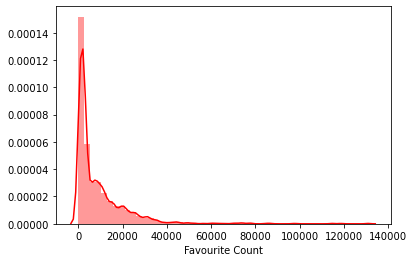

In [51]:
# the first insight
j = sns.distplot(twitter_co.favorite_count, color = 'red',axlabel = 'Favourite Count')
plt.show()


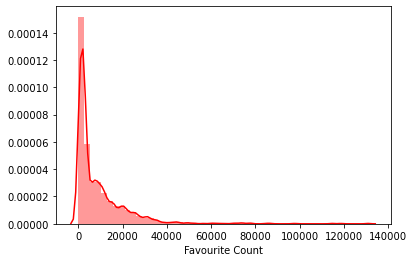

In [52]:
# the first insight
j = sns.distplot(twitter_co.favorite_count, color = 'red',axlabel = 'Favourite Count')
plt.show()


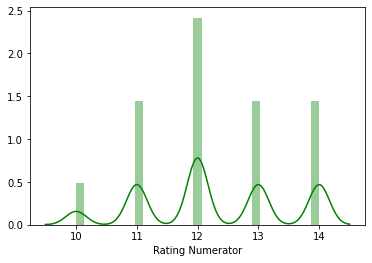

In [53]:
# the Third insight
f= sns.distplot(twitter_co['rating_numerator'],color = 'green',axlabel='Rating Numerator')
plt.show()



# The visualization

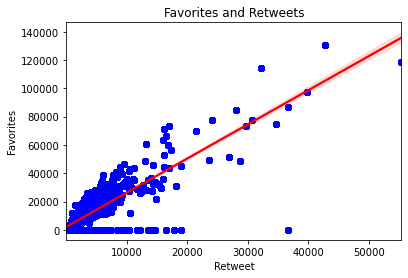

In [54]:
g = sns.regplot(x=twitter_co.retweet_count, y=twitter_co.favorite_count,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Favorites and Retweets")
plt.xlabel('Retweet')
plt.ylabel('Favorites')
plt.show()